In [4]:
import sqlite3
import mysql.connector
import pandas as pd
import getpass
import sqlalchemy as sq
import psycopg2
import numpy as np
import mpl_toolkits
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import datetime
from collections import Counter

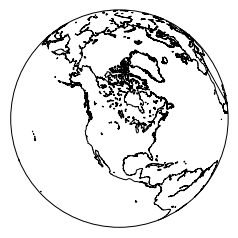

In [5]:
# from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
 
# make sure the value of resolution is a lowercase L,
#  for 'low', not a numeral 1
map = Basemap(projection='ortho', lat_0=50, lon_0=-100,
              resolution='l', area_thresh=1000.0)
 
map.drawcoastlines()
 
plt.show()

In [374]:
ddf = pd.read_csv('duration_histories.csv')
cdf = pd.read_csv('consigner_trips.csv')

In [375]:
ddf.shape, cdf.shape

((115627, 18), (21165, 48))

In [376]:
ddf = ddf.dropna()

In [377]:
ddf.columns

Index([u'vehicle_no', u'distance_travelled', u'avg_speed', u'start_timestamp',
       u'end_timestamp', u'start_landmark', u'end_landmark', u'old_state',
       u'new_state', u'duration', u'distance_km', u'createdAt', u'updatedAt',
       u'end_lat', u'end_long', u'start_lat', u'start_long',
       u'old_distance_km'],
      dtype='object')

In [378]:
cdf.columns

Index([u'id', u'trucker_id', u'truck_id', u'shipper_id', u'consigner_id',
       u'consignee_id', u'source', u'data_string', u'invoice_no',
       u'lorry_receipt_no', u'consigner_name', u'consignee_name',
       u'transporter', u'eta', u'origin', u'destination', u'loading_area',
       u'start_date', u'end_date', u'closed_by', u'closed_date', u'is_active',
       u'created_at', u'updated_at', u'slug', u'card_no',
       u'vehicle_entry_time', u'vehicle_exit_time', u'vehicle_no', u'status',
       u'state', u'consigner_pincode_id', u'consignee_pincode_id',
       u'consignee_lat', u'consignee_long', u'closure_reason',
       u'consigner_code', u'consigner_lat', u'consigner_long',
       u'loading_in_time', u'loading_out_time', u'unloading_in_time',
       u'unloading_out_time', u'IMEI', u'loading_poi_id', u'unloading_poi_id',
       u'unloading_poi_history_id', u'loading_poi_history_id'],
      dtype='object')

In [379]:
ddf.new_state.value_counts()

moving     48503
stopped    43813
idle       22669
sim          215
null          10
SIM            6
Name: new_state, dtype: int64

In [380]:
cdf.shape

(21165, 48)

In [381]:
cdf = cdf.dropna(subset=['origin'])

In [382]:
cdf.shape

(20219, 48)

In [413]:
df = pd.DataFrame(columns=['vehicle_no','start_date','end_date','origin','destination'])
for truck in ddf.vehicle_no.unique().tolist():
    ap_df = cdf.loc[cdf['vehicle_no'] == truck]
    df = df.append(ap_df[['vehicle_no','start_date','end_date','origin','destination']])

In [414]:
df['start_date'] = df['start_date'].astype(str)
df['start_date'] = df['start_date'].apply(lambda x: np.nan if x == 'nan' else datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S').date())

In [415]:
df['end_date'] = df['start_date'] + datetime.timedelta(hours=120)

In [405]:
ddf = ddf.sort_values(['vehicle_no','start_timestamp'])

In [408]:
# ddf['start_timestamp'] = ddf['start_timestamp'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
# ddf['end_timestamp'] = ddf['end_timestamp'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))

In [407]:
ddf['start_time'] = ddf['start_timestamp']
ddf['end_time'] = ddf['end_timestamp']

In [393]:
ddf['start_time'] = ddf['start_time'].apply(lambda x: x.date())
ddf['end_time'] = ddf['end_time'].apply(lambda x: x.date())

In [394]:
ddf = ddf[ddf['vehicle_no'].isin(df.vehicle_no.unique().tolist())]

In [395]:
ddf = ddf.reset_index(drop=True)

In [396]:
ddf = ddf.sort_values(['vehicle_no','start_timestamp'])

In [397]:
ddf['origin'] = ''
ddf['destination'] = ''

In [398]:
# df

In [399]:
# df[(df['vehicle_no'] == 'AP05TA6219') & (df['start_date'] == datetime.datetime(2017,11,29))]['origin'].values[0]

In [416]:
df_copy = df.copy()

In [417]:
df = df.dropna()

In [418]:
df_copy.shape, df.shape

((8765, 5), (6228, 5))

In [420]:
for truck in df.vehicle_no.unique().tolist():
    for st_date in df[df.vehicle_no == truck]['start_date'].unique().tolist():
        lis = [df[(df['vehicle_no'] == truck) & (df['start_date'] == st_date)]['origin'].values[0], df[(df['vehicle_no'] == truck) & (df['start_date'] == st_date)]['destination'].values[0]]
        ddf.loc[(ddf['vehicle_no'] == truck) & (ddf['start_time'] >= st_date) & (ddf['end_time'] <= (st_date + datetime.timedelta(hours=144))), ['origin','destination']] = lis
#         print lis
    

OutOfBoundsDatetime: Out of bounds nanosecond timestamp: 24-05-17 00:00:00

In [421]:
df[(df['vehicle_no'] == truck) & (df['start_date'] == st_date)]['origin'].values[0]

'Bamaloi'

In [422]:
ddf_copy = ddf.copy()

In [370]:
# test = ddf.loc[ddf.origin == '']
for truck in df.vehicle_no.unique().tolist():
    ab = [df[df['vehicle_no'] == truck]['origin'].values[0], df[df['vehicle_no'] == truck ]['destination'].values[0]]
#     ddf.loc[ddf.origin == ''].loc[ddf.loc[ddf.origin == ''].vehicle_no == truck, ['origin','destination']] = lis
    ddf.loc[(ddf.origin == '') & (ddf.vehicle_no == truck), ['origin','destination']] = ab
#     lis.append(ab)

In [373]:
ddf.to_csv('ddf.csv', index=False)